# <font color='blue'>Equações Não Lineares</font>

## Solução dos Exercícios

### Material produzido por Luis Gustavo Nonato

ICMC-USP

----

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercício 1)
Encontre todas as raízes da função $f(x)=x^2-\sin(x)$ utilizando o método de Newton.

[0. 0.]


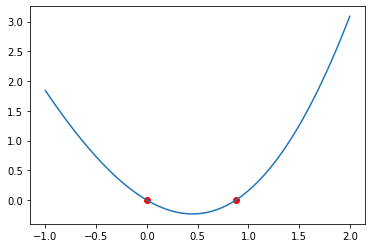

In [7]:
x = np.linspace(-1,2,100)
f = lambda t: t**2-np.sin(t)
fl = lambda t: 2*t-np.cos(t)

plt.plot(x,f(x))

# vemos que a função possui duas raizes

xi = np.array([-0.5,1.5])
for i in range(10):
    xi = xi-f(xi)/fl(xi)
    
print(f(xi))
plt.scatter(xi,f(xi),color='red')

### Exercício 2)
Encontre a solução da equação $\sin(x)=\frac{x}{4}$. Analise como o método de Newton se comporta neste caso e tende entender geometricamente o que está acontecendo.

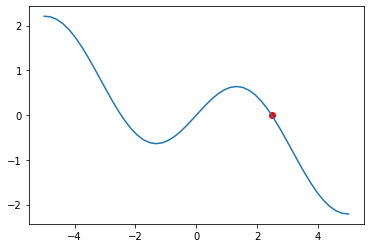

In [10]:
# Resolver a equação é equivalente a encontrar o zero de g(x) = sin(x) - x/4

x = np.linspace(-5,5,50)
g = lambda t: np.sin(t)-t/4
gl = lambda t: np.cos(t)-1/4

xi = 1.0
for i in range(100):  # note que se o número de passos é pequeno o método tende a não convergir 
    xi = xi-g(xi)/gl(xi)
    
plt.plot(x,g(x))
plt.scatter(xi,g(xi),color='red')

### Exercício 3)
Encontre a solução para o seguinte sistema de equações:

$$
h_1(x,y)= x^2+xy^2 = 9\\
h_2(x,y)= 3x^2y-y^3=4
$$

Faça a representação gráfica das curvas no intervalo $x\in[-5,5]$ e $y\in[-5,5]$ e verifique visualmente se a solução encontrada está correta. Veja se consegue definir condições iniciais para atingir todas as soluções que podem ser visualizadas na representação gráfica.

In [27]:
h1 = lambda x1,x2: x1**2 + x1*x2**2 - 9
h2 = lambda x1,x2: 3*x1**2*x2 - x2**3 - 4

J = lambda x1,x2: np.array([[2*x1 + x2**2, 2*x1*x2],[6*x1*x2, -3*x2**2]])

xi = np.array([-3.2,-0.01])
H = np.zeros(2)
for i in range(20):
    H[:] = [h1(xi[0],xi[1]),h2(xi[0],xi[1])]
    Dx = np.linalg.solve(J(xi[0],xi[1]),-1.0*H)
    xi = xi + Dx
    
print(h1(xi[0],xi[1]),h2(xi[0],xi[1]))

0.01038253270155387 0.03191995878917098


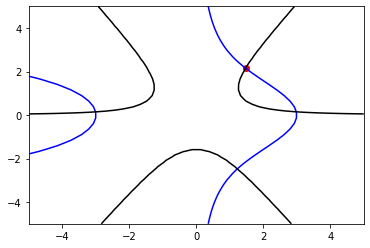

In [28]:
xx1, xx2 = np.meshgrid(np.linspace(-5,5,40),np.linspace(-5,5,40))
zz1 = h1(xx1,xx2)
zz2 = h2(xx1,xx2)

fig, ax = plt.subplots()
CS1 = ax.contour(xx1, xx2, zz1,levels = [0.0],colors='b')
CS2 = ax.contour(xx1, xx2, zz2,levels = [0.0],colors='k')
plt.scatter(xi[0],xi[1],color='red')

### Exercício 4)
Utilize o método de Newton e Quase-Newton para encontrar o ponto de mínimo da função:

$$
f(x,y)=(y-x^2)^2+(1-x)^2
$$

Compare a velocidade de convergência dos dois métodos.

**Solução**

O ponto de mínimo ocorre onde o gradiente é zero, ou seja, temos que resolver:

$$
\nabla f(x,y)=0 \rightarrow
\left\{\begin{matrix}
-4x(y-x^2) - 2(1-x) = 0\\
2(y-x^2) = 0
\end{matrix}\right.
$$

In [35]:
h1 = lambda x,y: -4*x*(y-x**2) - 2*(1-x)
h2 = lambda x,y: 2*(y-x**2)

J = lambda x,y: np.array([[-4*(y-x**2) + 8*x**2 + 2, -4*x],[-4*x, 2]])

In [36]:
# Newton

eps = 1e-7

xi = np.array([0.9,0.9])
H = np.zeros(2)
for i in range(20):
    H[:] = [h1(xi[0],xi[1]),h2(xi[0],xi[1])]
    Dx = np.linalg.solve(J(xi[0],xi[1]),-1.0*H)
    if (np.linalg.norm(Dx) < eps):
        print('Convergiu em',i,'passos')
        break
    xi = xi + Dx
    
print(h1(xi[0],xi[1]),h2(xi[0],xi[1]))

Convergiu em 4 passos
2.2493118478911795e-12 -6.625811010962934e-13


In [38]:
# Quase-Newton

Bk = np.identity(2)
xk = np.array([0.9,0.9])
Hk = np.array([h1(xk[0],xk[1]),h2(xk[0],xk[1])])
for i in range(100):    
    Dx = np.linalg.solve(Bk,-1.0*Hk)    
    if (np.linalg.norm(Dx) < eps):
        print('Convergiu em',i,'passos')
        break
    xk = xk + Dx                      
    Hk1 = np.array([h1(xk[0],xk[1]),h2(xk[0],xk[1])])
    yk = Hk1 - Hk          
    sk = Dx           
    Bk = Bk + ((yk-np.dot(Bk,sk)).reshape(-1,1)*sk)/np.dot(sk,sk)     
    Hk = Hk1

print(xk,[h1(xk[0],xk[1]),h2(xk[0],xk[1])])

Convergiu em 11 passos
[0.99999999 0.99999998] [-2.7491443484691466e-08, 4.313511992037888e-09]


### Exercício 5)
Utilize os multiplicadores de Lagrange para determinar todos os pontos que sejam solução de 

$$\min x^2y \quad \mbox{sujeito a } \\ x^2+2y^2=6$$

**Solução**: 

Os multiplicadores de Lagrange dá origem ao sistema de equações:

$$
2xy-2\lambda x = 0\\
x^2-4\lambda y = 0\\
x^2+2y^2-6 = 0
$$

A Jacobiana se torna:

$$
J = 
\begin{bmatrix}
2(y-\lambda) & 2x & -2x \\
2x & -4\lambda & -4y \\
2x & 4y & 0
\end{bmatrix}
$$

In [55]:
h1 = lambda x: 2*x[0]*x[1]-2*x[2]*x[0]
h2 = lambda x: x[0]**2-4*x[2]*x[1]
h3 = lambda x: x[0]**2 + 2*x[1]**2 - 6

J = lambda x: np.array([[2*(x[1]-x[2]),2*x[0],-2*x[0]],
                        [2*x[0],-4*x[2],-4*x[1]],
                        [2*x[0], 4*x[1], 0]])

f = lambda x: x[0]**2*x[1]

def Newton_exe1(X_0):
    n = 100
    X = np.array(X_0)  # condição inicial, X[0] = x, X[1] = y, X[2] = lambda
    H = np.zeros(3)
    for i in range(1,n):
        H[:] = [h1(X),h2(X),h3(X)]
        dx = np.linalg.solve(J(X),-1*H)
        X = X+dx
    
    return(X)

Text(0.5, 1.0, 'curvas de nivel')

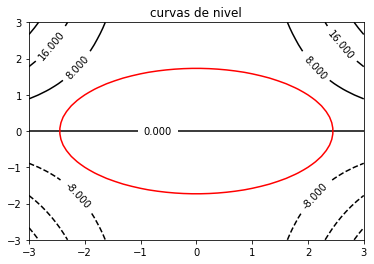

In [40]:
xx, yy = np.meshgrid(np.linspace(-3,3,40), np.linspace(-3,3,40))
zz = xx**2*yy

fig, ax = plt.subplots()
CS1 = ax.contour(xx, yy, zz,colors='k')
CS2 = ax.contour(xx, yy, xx**2+2*yy**2-6.0,colors='red',levels=[0])
ax.clabel(CS1, inline=1, fontsize=10)
ax.set_title('curvas de nivel')

[-2.  1.] 4.0
[ 2. -1.] -4.0
[2. 1.] 4.0
[ 0.   -1.73] -0.0
[ 0.   -1.73] -0.0
[ 0.   -1.73] -0.0


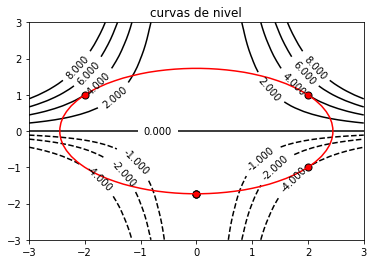

In [56]:
xx, yy = np.meshgrid(np.linspace(-3,3,40), np.linspace(-3,3,40))
zz = xx**2*yy

fig, ax = plt.subplots()
CS1 = ax.contour(xx, yy, zz,colors='k',levels=[-4,-2,-1,0,2,4,6,8])
CS2 = ax.contour(xx, yy, xx**2+2*yy**2-6.0,colors='red',levels=[0])
ax.clabel(CS1, inline=1, fontsize=10)
ax.set_title('curvas de nivel')

np.set_printoptions(precision=2)

#X0 = np.array([[-2,1,1],[-2,-2,1],[2,2,1],[0,2,1],[-2,-1.001,1],[-2,-1.01,1]])
X0 = np.array([[-2.1,1.1,1],[-0.1,1.1,1],[2.1,1.1,1],[1.95,-1.1,1],[0.1,-2.1,1],[-1.95,-1.1,1]])

for i in range(X0.shape[0]):
    S = Newton_exe1(X0[i])
    print(S[:2],f(S))
    plt.scatter(S[0],S[1],color='red',s=50, edgecolors= "black")

**OBS**: Note que os pontos $(-2,1)$ e $(2,1)$ satisfazem a restrição, mas o método de Newton não consegue encontrá-los. A razão é que a Jacobiana é singular nestes dois pontos, logo, o método de Newton não pode ser aplicado para encontrá-los !!

## Exercício 6)
Repita o exercício anterior utilizando o método Quase-Newton. Utilizando condições iniciais apropriadas, veja se consegue encontrar todas as soluções. 

In [59]:
def Quase_Newton_exe1(X0):
    Bk = np.identity(3)
    xk = np.array(X0)
    Hk = np.array([h1(xk),h2(xk),h3(xk)])
    for i in range(100):    
        Dx = np.linalg.solve(Bk,-1.0*Hk)    
        if (np.linalg.norm(Dx) < 1e-7):
            break
        xk = xk + Dx                      
        Hk1 = np.array([h1(xk),h2(xk),h3(xk)])
        yk = Hk1 - Hk          
        sk = Dx           
        Bk = Bk + ((yk-np.dot(Bk,sk)).reshape(-1,1)*sk)/np.dot(sk,sk)     
        Hk = Hk1
    if (i==100):
        print('Não convergiu')
    return(xk)

[-2.  1.] 3.9999996932482356
[6.45e-09 1.73e+00] 7.214255322814654e-17
[2. 1.] 3.9999996932482356
[ 2. -1.] -4.000000154522887
[-8.58e-09 -1.73e+00] -1.273798445723962e-16
[-2. -1.] -4.000000154522887


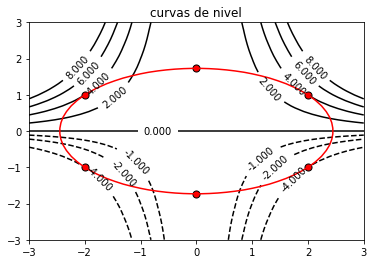

In [60]:
xx, yy = np.meshgrid(np.linspace(-3,3,40), np.linspace(-3,3,40))
zz = xx**2*yy

fig, ax = plt.subplots()
CS1 = ax.contour(xx, yy, zz,colors='k',levels=[-4,-2,-1,0,2,4,6,8])
CS2 = ax.contour(xx, yy, xx**2+2*yy**2-6.0,colors='red',levels=[0])
ax.clabel(CS1, inline=1, fontsize=10)
ax.set_title('curvas de nivel')

np.set_printoptions(precision=2)

X0 = np.array([[-2.1,1.1,1],[-0.1,1.1,1],[2.1,1.1,1],[1.95,-1.1,1],[0.1,-2.1,1],[-1.95,-1.1,1]])

for i in range(X0.shape[0]):
    S = Quase_Newton_exe1(X0[i])
    print(S[:2],f(S))
    plt.scatter(S[0],S[1],color='red',s=50, edgecolors= "black")

### Exercício 7) 

Encontre o ponto da parábola $y=x^2$ que está mais próximo do ponto $(3,1)$.

**Solução**

O problema consistem em resolver:

$$
\min\, (x-3)^2+(y-1)^2,\quad \mbox{sujeito a}\\
x^2-y=0
$$

O multiplicador de Lagrange nos dá o sistema de equações

$$
2(x-3) -2\lambda x = 0\\
2(y-1)+\lambda = 0\\
x^2-y=0
$$

sendo a Jacobiana 

$$
J = \begin{bmatrix}
2(1-\lambda) & 0 & -2x\\
0 & 2 & 1\\
2x & -1 & 0
\end{bmatrix}
$$

In [88]:
h1 = lambda X: 2*(X[0]-3) -2*X[0]*X[2]
h2 = lambda X: 2*(X[1]-1)+X[2]
h3 = lambda X:  X[0]**2 -X[1]

def Newton_exe7(X_0):
    n = 20
    X = np.array(X_0)  # condição inicial
    H = np.zeros(3)
    for i in range(n):
        H[:] = [h1(X), h2(X), h3(X)]
        J = np.asarray([[2*(1-X[2]),0,-2*X[0]],
                        [0,2,1],
                        [2*X[0], -1, 0]])
        dx = np.linalg.solve(J,-1*H)
        X = X+dx
    
    return(X)

O ponto mais próximo de (3,1) é [1.29 1.66]


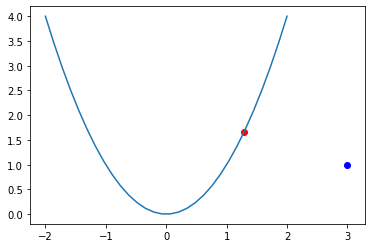

In [89]:
S = Newton_exe7([2,1,1])

t = np.linspace(-2,2,30)
plt.plot(t,t**2)
plt.scatter(3,1,color='blue')
plt.scatter(S[0],S[1],color='red')

print('O ponto mais próximo de (3,1) é',S[:2])

### Exercício 8)

Determine a curva de nível de $f(x,y)=x^2+16y^2$ que seja tangente à curva $xy=1$, $x>0$ e $y>0$. Qual o ponto de tangência?

**Solução**

Sabemos que os pontos onde as curvas de nível de $f(x,y)$ são tangentes a curva $g(x,y)=0$ satisfazem a condição:

$$
\nabla f = \lambda\nabla g
$$

que é a condição utilizada pelos multiplicadores de Lagrange. Desta forma podemos aplicar multiplicadores de Lagrange para encontrar os pontos críticos de 

$$
F(x,y,\lambda) = f(x,y)+\lambda g(x,y)
$$

que serão os pontos de tangência.

In [84]:
h1 = lambda x: 2*x[0] - x[2]*x[1]
h2 = lambda x: 32*x[1] - x[2]*x[0]
h3 = lambda x: x[0]*x[1] - 1

f = lambda x: x[0]**2 + 16*x[1]**2

J = lambda x: np.array([[2,-x[2],-x[1]],[-x[2],32,-x[0]],[x[1],x[0],0]])

def Newton_exe8(X_0):
    n = 100
    X = np.array(X_0)  # condição inicial, X[0] = x, X[1] = y, X[2] = lambda
    H = np.zeros(3)
    for i in range(1,n):
        H[:] = [h1(X),h2(X),h3(X)]
        dx = np.linalg.solve(J(X),-1*H)
        X = X+dx
    
    return(X)

<a list of 3 text.Text objects>

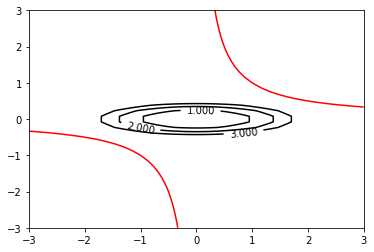

In [82]:
xx, yy = np.meshgrid(np.linspace(-3,3,40), np.linspace(-3,3,40))
zz = xx**2 + 16*yy**2

fig, ax = plt.subplots()
CS1 = ax.contour(xx, yy, zz,colors='k',levels=[-1,0,1,2,3])
CS2 = ax.contour(xx, yy, xx*yy-1,colors='red',levels=[0])
ax.clabel(CS1, inline=1, fontsize=10)

In [85]:
# teremos duas soluções, porém somente uma no quadrante positivo x>0, y>0

s = Newton_exe8([2,1,1])

print('A curva de nível é',f(s))
print('O ponto de tangência no quadrante positivo é',s[:2])

A curva de nível é 8.0
O ponto de tangência é [2.  0.5]


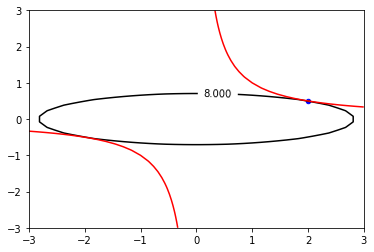

In [87]:
xx, yy = np.meshgrid(np.linspace(-3,3,40), np.linspace(-3,3,40))
zz = xx**2 + 16*yy**2

fig, ax = plt.subplots()
CS1 = ax.contour(xx, yy, zz,colors='k',levels=[8])
CS2 = ax.contour(xx, yy, xx*yy-1,colors='red',levels=[0])
ax.clabel(CS1, inline=1, fontsize=10)

plt.scatter(s[0],s[1],s=20,color='b')

### Exercício 9)
Encontre os pontos da curva $x^2−6xy−7y^2+80=0$ mais próximos da origem. Desenhe a curva.

In [38]:
h1 = lambda X: 2*X[0] - X[2]*(2*X[0]-6*X[1])
h2 = lambda X: 2*X[1] - X[2]*(-6*X[0]-14*X[1])
h3 = lambda X: -X[0]**2 + 6*X[0]*X[1] +7*X[1]**2 - 80

J = lambda X: np.array([[2-2*X[2], 6*X[2], -2*X[0] + 6*X[1]],
                        [6*X[2], 2+14*X[2], 6*X[0] + 14*X[1]],
                        [-2*X[0]+6*X[1], 6*X[0] + 14*X[1], 0]])

def Newton_exe9(X_0):
    n = 100
    X = np.array(X_0)  # condição inicial
    H = np.zeros(3)
    for i in range(n):
        H[:] = [h1(X), h2(X), h3(X)]
        dx = np.linalg.solve(J(X),-1*H)
        X = X+dx
    
    return(X)

In [45]:
p1 = Newton_exe9([1,1,1])
print(p1)

p2 = Newton_exe9([-1,-1,1])
print(p2)

[ 1.     3.    -0.125]
[-1.    -3.    -0.125]


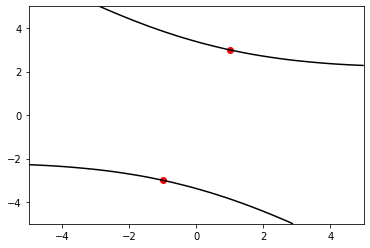

In [46]:
xx, yy = np.meshgrid(np.linspace(-5,5,40), np.linspace(-5,5,40))
zz = xx**2 - 6*xx*yy - 7*yy**2 + 80

fig, ax = plt.subplots()
CS1 = ax.contour(xx, yy, zz,colors='k',levels=[0])

plt.scatter(p1[0],p1[1],color='red')
plt.scatter(p2[0],p2[1],color='red')

### Exercício 10)
O pacote <font color='blue'> optimize </font> do <font color='blue'> scipy </font> possui uma função <font color='blue'> fsolve </font> que implementa um método para encontrar a raiz de um sistema de equações não lineares. O código abaixo fornece um exemplo da função para encontrar a solução de:

$$
x^2 + y^2 - 4 = 0\\
x^2−6xy−7y^2+80 = 0
$$

In [50]:
# exemplo do método fsolve
from scipy.optimize import fsolve

f = lambda x: [x[0]**2+x[1]**2-4, x[0]**2-6*x[0]*x[1]-7*x[1]**2+80]

s = fsolve(f,[1,2])  # o parâmetro [1,2] é a condição inicial

print(s)

[0.99153293 2.98733567]


Compare o resultado da função <font color='blue'> fsolve </font> com os resultados obtidos nos exercícios 5) e 6).

**Solução**

O sistema a ser resolvido no exercício 5) é 

$$
2xy-2\lambda x = 0\\
x^2-4\lambda y = 0\\
x^2+2y^2-6 = 0
$$

[-2.  1.] 3.999999999999805
[-2.  1.] 4.000000000000646
[2. 1.] 3.999999999999805
[ 2. -1.] -3.9999999999999516
[-8.13e-13 -1.73e+00] -1.1441845672838081e-24
[-2. -1.] -3.9999999999999516


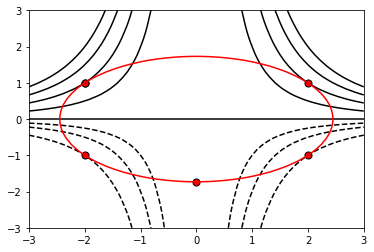

In [62]:
fexe5 = lambda x: [2*x[0]*x[1] - 2*x[0]*x[2], x[0]**2 - 4*x[1]*x[2], x[0]**2 + 2*x[1]**2 -6]

xx, yy = np.meshgrid(np.linspace(-3,3,40), np.linspace(-3,3,40))
zz = xx**2*yy

fig, ax = plt.subplots()
CS1 = ax.contour(xx, yy, zz,colors='k',levels=[-4,-2,-1,0,2,4,6,8])
CS2 = ax.contour(xx, yy, xx**2+2*yy**2-6.0,colors='red',levels=[0])

X0 = np.array([[-2.1,1.1,1],[-0.1,1.1,1],[2.1,1.1,1],[1.95,-1.1,1],[0.1,-2.1,1],[-1.95,-1.1,1]])

for i in range(X0.shape[0]):
    S = fsolve(fexe5,X0[i])
    print(S[:2],f(S))
    plt.scatter(S[0],S[1],color='red',s=50, edgecolors= "black")
    

Note que o fsolve não foi capaz de encontrar uma das soluções, enquanto que com as mesmas condições iniciais o método Quase-Newton encontrou todas.
